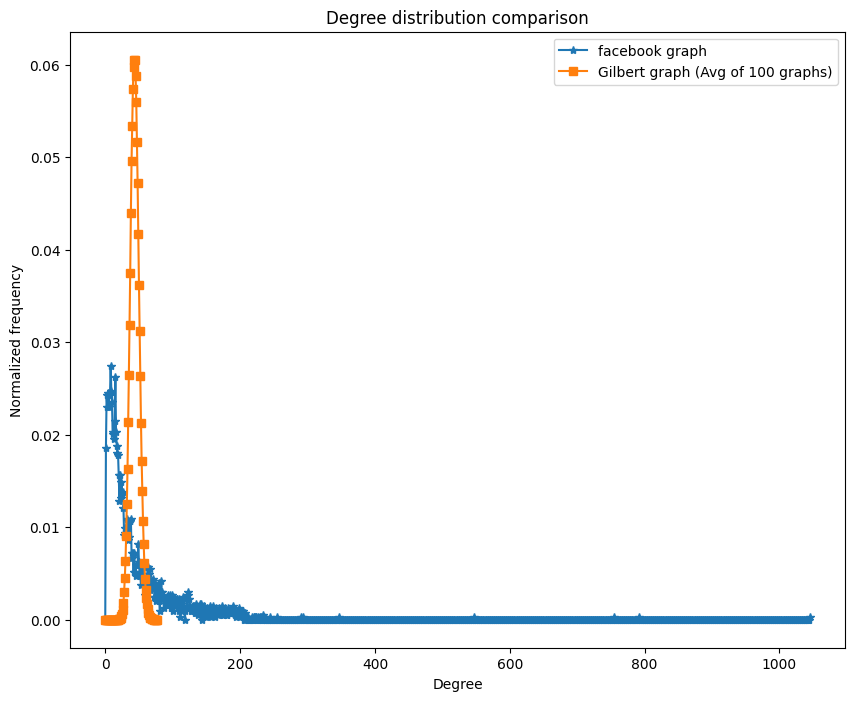

C:\Users\DELL\AppData\Local\Temp\ipykernel_1988\213367749.py:113: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


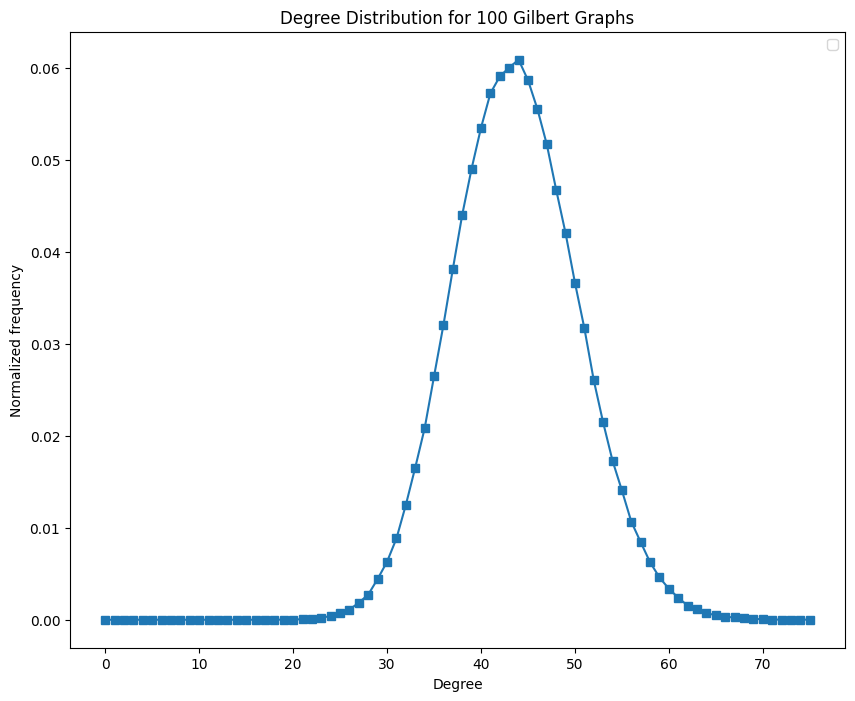

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def read(g):
    df = pd.read_csv(g)
    edge = []
    for i in range(len(df)):
        edge.append((df.loc[i, 'u'], df.loc[i, 'v']))
    node = set(df['u']).union(set(df['v']))
    return node, edge

def gilbert(n, p):
    node = list(range(n))
    edge = []
    
    for u in node:
        for v in node:
            if u < v and random.random() < p:
                edge.append((u, v))
    
    return node, edge


def degree_dist(n, e):
    degree_count = {}
    
    for i in n:
        degree_count[i] = 0

 
    for u, v in e:
        degree_count[u] += 1
        degree_count[v] += 1
    degree = list(degree_count.values())

    if degree:
        maxi = max(degree)
    else:
        maxi = 0

    hist = np.bincount(degree, minlength=maxi + 1)

    return hist / sum(hist) 


def avg_random_dist(n, p, iter):
    distributions = []
    for i in range(iter):
        node, edge = gilbert(n, p)
        distribution = degree_dist(node, edge)
        distributions.append(distribution)

    max_len = 0
    for d in distributions:
        if len(d) > max_len:
            max_len = len(d)

    padded_distributions = []
    for di in distributions:
        padded_dist = np.pad(di, (0, max_len - len(di)))
        padded_distributions.append(padded_dist)

    return np.mean(padded_distributions, axis=0)


graphs = "facebook_network.csv"  
nodes_real, edges_real = read(graphs)

n = len(nodes_real)
m = len(edges_real)
p = 2 * m / (n * (n - 1)) 

real_distribution = degree_dist(nodes_real, edges_real)
random_distribution = avg_random_dist(n, p,100)

plt.figure(figsize=(10, 8))
plt.plot(real_distribution, marker='*', label='facebook graph')
plt.plot(random_distribution, marker='s', label='Gilbert graph (Avg of 100 graphs)')
plt.xlabel("Degree")
plt.ylabel("Normalized frequency")
plt.legend()
plt.title("Degree distribution comparison")
plt.savefig("q4_degree_distribution_comparison.png")
plt.show()

distributions_100 = []

for i in range(100):
    node, edge = gilbert(n, p)
    distribution = degree_dist(node, edge)
    distributions_100.append(distribution)

max_len_100 = 0
for o in distributions_100:
    if len(o) > max_len_100:
        max_len_100 = len(o)

padded_distributions_100 = []
for l in distributions_100:
    padding_needed = max_len_100 - len(l)
    padded_distribution = np.pad(l, (0, padding_needed))
    padded_distributions_100.append(padded_distribution)

avg_distribution_100 = np.mean(padded_distributions_100, axis=0)


plt.figure(figsize=(10, 8))
plt.plot(avg_distribution_100, marker='s')
plt.xlabel("Degree")
plt.ylabel("Normalized frequency")
plt.legend()
plt.title("Degree Distribution for 100 Gilbert Graphs")
plt.savefig('q4_gilbert_100_graph.png') 
plt.show()

### Comparison

## Degree Distribution Comparison

- The real network: Facebook network has a Skewed Distribution: The degree distribution is highly skewed with a long tail, meaning that most nodes have a low degree (few connections), while a small number of nodes (hubs) have very high degrees. This is a hallmark of scale-free networks.
- The facebook network is characterized by a long tail, indicating that most nodes have a low degree, but a few nodes (hubs) have a very high degree. This is typical of scale-free networks or social networks.
- The Gilbert graph has a Bell-shaped Distribution: The degree distribution is roughly symmetric and concentrated around the mean degree. This is typical of random graphs, where each edge is formed independently with a fixed probability p.
- The Gilbert graph has a narrow, symmetric distribution, centered around the mean degree.




## Random graph over 100 instances
- Bell-shaped Curve:
The degree distribution forms a symmetric, bell-shaped curve, which is characteristic of random graphs.
- The distribution has a sharp peak, indicating the most frequent degree value (mode) is near the mean degree.